# Agglomerative Hierarchical Clustering

In [1]:
# Importing necessary packages and dataset
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the dataset
x, y = make_blobs()
print("Dimension of independent variables is: ", x.shape)

Dimension of independent variables is:  (100, 2)


In [3]:
x

array([[  4.37885414,   1.07772573],
       [ -6.84854631,  -7.93874709],
       [  3.59023455,  -2.25723713],
       [  4.8323965 ,  -6.7664998 ],
       [ -6.35830783,  -7.81031533],
       [  4.44254094,  -7.80534881],
       [  4.24548734,  -2.17315894],
       [ -5.88266224,  -7.13337789],
       [  4.52182666,  -6.01984815],
       [  5.89210104,  -7.18055823],
       [  2.42518268,  -0.83116021],
       [  3.33539793,  -0.24191075],
       [ -6.20139684,  -5.03392005],
       [  5.56623218,  -1.19840539],
       [  3.46429063,  -2.79791034],
       [  4.12211075,  -6.0508768 ],
       [  6.77807556,  -8.37654386],
       [  3.57718588,  -7.64763323],
       [  6.58608047,  -4.73642422],
       [  3.38627089,   0.14888606],
       [  4.9332126 ,  -9.09923909],
       [ -6.17330521,  -7.72122625],
       [  4.40306064,   0.89886503],
       [ -5.57333968,  -6.94245617],
       [  3.38586098,  -0.03874845],
       [ -5.78228131,  -8.23032152],
       [  3.612457  ,  -0.89971818],
 

In [4]:
y

array([2, 0, 2, 1, 0, 1, 2, 0, 1, 1, 2, 2, 0, 2, 2, 1, 1, 1, 1, 2, 1, 0,
       2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 1,
       0, 2, 1, 2, 1, 0, 1, 0, 0, 1, 1, 2, 1, 2, 1, 0, 1, 2, 0, 2, 1, 1,
       2, 2, 2, 0, 0, 0, 2, 1, 0, 0, 1, 2, 1, 1, 0, 1, 1, 2, 1, 0, 1, 1,
       2, 0, 0, 0, 1, 2, 2, 1, 1, 1, 0, 2])

In [5]:
# Performing clustering
agg = AgglomerativeClustering(n_clusters = 3)
ypred = agg.fit_predict(x)

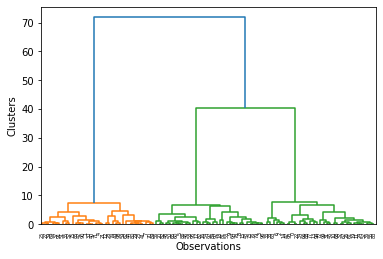

In [6]:
# Creating a dendrogram
result = ward(x)
dendrogram(result)
plt.xlabel("Observations")
plt.ylabel("Clusters")
plt.show()

In [7]:
# Sorting values in the form of dataframe
mydata = {"Original": y, "Predicted": ypred}
clusterdf = pd.DataFrame(mydata, columns = ["Original", "Predicted"])

In [8]:
clusterdf

,Original,Predicted
0,2,0
1,0,1
2,2,0
3,1,2
4,0,1
...,...,...
95,1,2
96,1,2
97,1,2
98,0,1


In [9]:
# Creating names of the clusters
clusterdf["Original"].replace(to_replace = int("0"), value = "Class 0", inplace = True)
clusterdf["Original"].replace(to_replace = int("1"), value = "Class 1", inplace = True)
clusterdf["Original"].replace(to_replace = int("2"), value = "Class 2", inplace = True)

clusterdf["Predicted"].replace(to_replace = int("0"), value = "Class 0", inplace = True)
clusterdf["Predicted"].replace(to_replace = int("1"), value = "Class 1", inplace = True)
clusterdf["Predicted"].replace(to_replace = int("2"), value = "Class 2", inplace = True)

In [10]:
# Creating Confusion Matrix
results = confusion_matrix(clusterdf["Original"], clusterdf["Predicted"])
print("The Confusion Matrix is: \n", results)

The Confusion Matrix is: 
 [[ 0 34  0]
 [ 0  0 33]
 [33  0  0]]


In [11]:
# Determing the accuracy of the model
score = accuracy_score(clusterdf["Original"], clusterdf["Predicted"])
print("The accuracy is: ", score)

The accuracy is:  0.0
